In [4]:
# 1. Baseline: Match class probas

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train = pd.read_table("../data/Kaggle/train.tsv")
test = pd.read_table("../data/Kaggle/test.tsv")

/Users/Mazan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


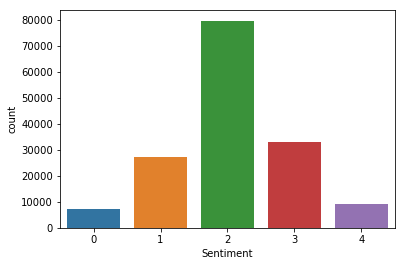

In [7]:
# plot sentiment distibution
f = sns.countplot(train["Sentiment"])
# f.get_figure().savefig("Plot/count_senti.pdf", bbox_inches='tight')

In [8]:
proba = list(train.groupby("Sentiment").count()["PhraseId"] / train.shape[0])

In [9]:
prediction = np.random.choice(np.arange(0, 5), p=proba, size = test.shape[0])

/Users/Mazan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


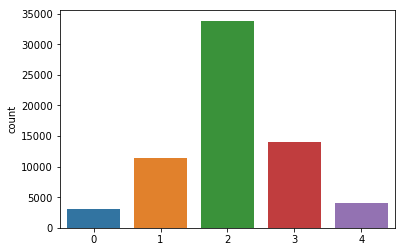

In [10]:
# plot distribution of distribution based baseline
sns.countplot(prediction)

In [11]:
output = pd.concat([test["PhraseId"], pd.Series(prediction)], axis = 1)
output.columns.values[1] = "Sentiment"

In [12]:
output.to_csv("predictions/class_probas.csv", index=False)

In [13]:
# score = 0.34215

In [14]:
# 2. Baseline: Mode

In [15]:
prediction = np.repeat(2, test.shape[0])

In [16]:
output = pd.concat([test["PhraseId"], pd.Series(prediction)], axis = 1)
output.columns.values[1] = "Sentiment"
output.to_csv("predictions/mode.csv", index=False)

In [17]:
# score = 0.51789

In [18]:
a = pd.DataFrame([["Prob. based", 0.34], ["Mode", 0.51]], columns = ["Model", "Score"])

In [19]:
a

,Model,Score
0,Prob. based,0.34
1,Mode,0.51


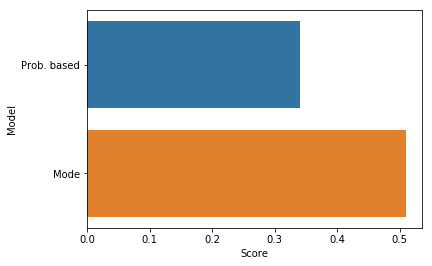

In [20]:
b = sns.barplot(y = a["Model"], x= a["Score"]).get_figure()

In [21]:
b.tight_layout()
# b.savefig("Plot/baselines.pdf")

In [22]:
from IPython.display import display
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)

In [23]:
train[(train["PhraseId"] == 101) | (train["PhraseId"] == 102) | (train["PhraseId"] == 104)]

,PhraseId,SentenceId,Phrase,Sentiment
100,101,3,would have a hard time sitting through this one .,1
101,102,3,would have a hard time sitting through this one,0
103,104,3,have a hard time sitting through this one,0


In [24]:
train

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what is good for the goose,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is good for the goose,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for the goose,2


In [25]:
train.isna().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [26]:
train['length'] = train['Phrase'].apply(len)

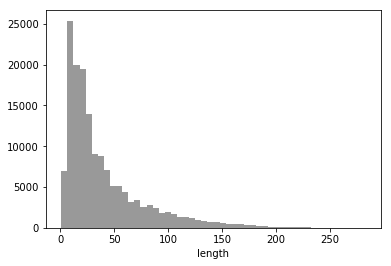

In [33]:
plot  = sns.distplot(train["length"], kde = False, color = "black").get_figure()

In [34]:
plot.savefig("Plot/dist_length.pdf")

/Users/Mazan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


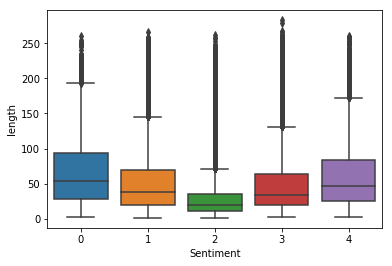

In [29]:
plot = sns.boxplot(x='Sentiment',y='length',data=train).get_figure()

In [30]:
plot.savefig("Plot/boxplot.pdf")

In [40]:
# Get sentence only 
idx = train.groupby(['SentenceId'])['length'].transform(max) == train['length']
train[idx]

,PhraseId,SentenceId,Phrase,Sentiment,length
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,188
63,64,2,"This quiet , introspective and entertaining independent is worth seeking .",4,74
81,82,3,"Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",1,100
116,117,4,"A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera .",3,152
156,157,5,Aggressive self-glorification and a manipulative whitewash .,1,60
166,167,6,A comedy-drama of nearly epic proportions rooted in a sincere performance by the title character undergoing midlife crisis .,4,124
198,199,7,"Narratively , Trouble Every Day is a plodding mess .",1,52
213,214,8,"The Importance of Being Earnest , so thick with wit it plays like a reading from Bartlett 's Familiar Quotations",3,112
247,248,9,But it does n't leave you with much .,1,37
259,260,10,You could hate it for the same reason .,1,39


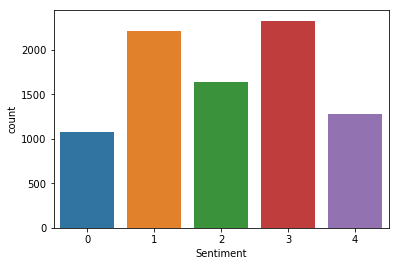

In [42]:
f = sns.countplot(train[idx]["Sentiment"])
f.get_figure().savefig("Plot/sentence_count_senti.pdf", bbox_inches='tight')

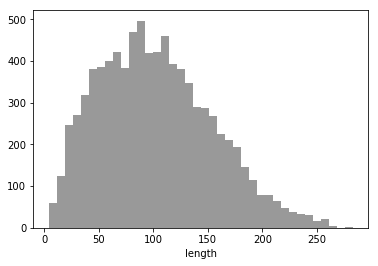

In [43]:
plot  = sns.distplot(train[idx]["length"], kde = False, color = "black").get_figure()
plot.savefig("Plot/sentence_dist_length.pdf")

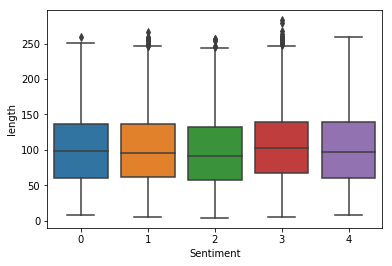

In [44]:
plot = sns.boxplot(x='Sentiment',y='length',data=train[idx]).get_figure()
plot.savefig("Plot/sentence_boxplot.pdf")

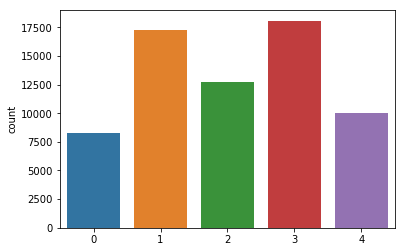

In [47]:
proba = list(train[idx].groupby("Sentiment").count()["PhraseId"] / train[idx].shape[0])
prediction = np.random.choice(np.arange(0, 5), p=proba, size = test.shape[0])

In [5]:
data = pd.read_csv("test_local_sentences.csv")

In [8]:
sentiment = np.array(data["Sentiment"])

In [12]:
prediction = np.random.randint(0, 5, sentiment.shape[0])

In [16]:
(sentiment == prediction).sum() / sentiment.shape[0]

0.20687772925764192

In [9]:
a = pd.DataFrame([["CNN", 0.5177,"in_train&validate"], 
                  ["CNN", 0.4173,"removed"], 
                  ["LSTM", 0.5292, "in_train&validate"], 
                  ["LSTM", 0.4383, "removed"], 
                  ["BLSTM", 0.5412, "in_train&validate"], 
                  ["BLSTM", 0.4513, "removed"]], 
                 columns = ["Model", "Score" ,"cat"])

In [10]:
a

,Model,Score,cat
0,CNN,0.5177,in_train&validate
1,CNN,0.4173,removed
2,LSTM,0.5292,in_train&validate
3,LSTM,0.4383,removed
4,BLSTM,0.5412,in_train&validate
5,BLSTM,0.4513,removed


In [66]:
x_pos = [-0.3, 0.09, 0.68, 1.08, 1.7, 2.08]

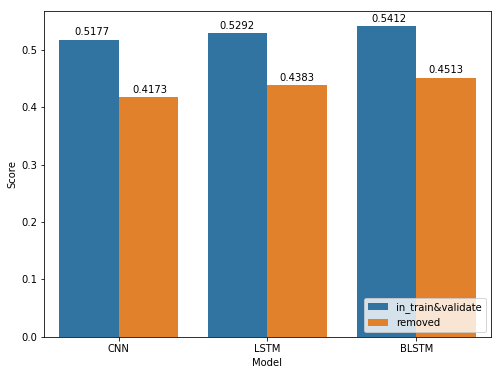

In [74]:
fig, ax = plt.subplots(figsize=(8, 6))
b = sns.barplot(x = a["Model"], y= a["Score"], hue =a["cat"]).get_figure()
plt.legend(loc = "lower right")
label = list(a["Score"])
for i in range(6):
    plt.text(x = x_pos[i], y = label[i] + 0.008, s = label[i])

In [76]:
b.tight_layout()
b.savefig("Plot/sentences.png")